<center> Choose Bucket using current flow betweenness centrality </center>
---

In [1]:
# First Import the libraries needed;

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
from IPython.core.display import display, HTML

# proalign libraries
import string_db
import interface
import organism
import align
import constants as cs

In [2]:
# basic percent generator if is number
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    try:
        return "{{:{}%}}".format(precision).format(float(v))
    except:
        return v

In [3]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606']
organism_names = ['yeast', 'fly', 'human']

organism_ids = ['4932', '7227']
organism_names = ['yeast', 'fly']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [4]:
# a function to run an alignment and return the results (make sure to update constants if needed)
def alignment_result(orgs, align_method, similarity_mode='raw_blast'):
    # sort ids
    orgs.sort()
    
    # get Organism network objects
    orgobjs = [organism_objs[organism_ids.index(x)] for x in orgs]

    # create the combined biological alignment network
    bio_net = organism.BioNet(orgobjs[0], orgobjs[1], similarity_mode)
    
    # create aligner object
    aligner = align.Aligner(align_method)
    
    # align the networks
    aligner.align(bio_net)
    
    # create a dictionary for the results and fill
    results = {}
    results['CE'] = aligner.ce
    results['EC'] = aligner.ec
    results['LCCS'] = aligner.lccs
    results['ICS'] = aligner.ics
    results['S^3'] = aligner.s3
    # results['GOC'] = aligner.GOC
    # results['PWS1'] = aligner.PWS1
    # results['PWS2'] = aligner.PWS2
    # results['NBS'] = aligner.nbs
    results['Frobenius Norm'] = aligner.frobenius
    
    # return all results
    return results

## Algorithms Comparison:

Let's see how different algorithms score on various datasets:

---

In [5]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
other_algs = ['isoN', 'NETAL', 'pinalog', 'CGRAAL', 'GRAAL', 'MIGRAAL', 'HubAlign', 'MAGNA', 'PROPER',
        'SPINAL-I', 'SPINAL-II']

other_alg_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in other_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=other_algs, columns=columns)
        other_alg_dfs[name] = df

In [6]:
# Or view all scores combined:

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([other_alg_dfs[x] for x in net_names], axis=0, keys=net_names)

CE        EC  LCCS       ICS       S^3  Frobenius Norm
yeast-fly isoN        6990  0.509512   544  0.774429  0.443669      172.232401
          NETAL        212  0.015453    35  0.010716  0.006368      253.373242
          pinalog     9400  0.685181   731  0.561898  0.446598      165.402539
          CGRAAL      5688  0.414607   661  0.273857  0.197493      216.041663
          GRAAL       5944  0.433268   210  0.342357  0.236464      213.658606
          MIGRAAL     5925  0.431883   549  0.305870  0.218112      213.836386
          HubAlign    8605  0.627232   224  0.414319  0.332458      187.098904
          MAGNA         95  0.006925    17  0.005149  0.002962      262.766056
          PROPER     10039  0.731759   771  0.525437  0.440578      161.027948
          SPINAL-I    9690  0.706320   737  0.489147  0.406477      167.056877
          SPINAL-II   9549  0.696042   806  0.478575  0.395846      171.318417

## TopoAlign previous algorithms
---

In [7]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
topo_algs = ['seedexsingle', 'seedexsingle-jac', 'seedexsingle-ada']

topo_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in topo_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=topo_algs, columns=columns)
        topo_dfs[name] = df

In [8]:
# Or view all scores combined:
print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE, cs.SEED_PR_ALPHA))

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([topo_dfs[x] for x in net_names], axis=0, keys=net_names)

Main parameteres: SEED_KEEP_RATIO: 0.3, BUCKET_SIZE: 1400


CE        EC  LCCS       ICS       S^3  \
yeast-fly seedexsingle      10464  0.762738   793  0.508208  0.438834   
          seedexsingle-jac  10053  0.732779   800  0.488436  0.414591   
          seedexsingle-ada  10381  0.756688   783  0.504716  0.434242   

                            Frobenius Norm  
yeast-fly seedexsingle          166.042163  
          seedexsingle-jac      170.921034  
          seedexsingle-ada      167.038918

---

## Parameter Comparison (Organisms: Yeast-Fly)

Now Let's compare different parameters from our own algorithm:


### bucket size & keep ratio
---


In [6]:
%%capture

# list of our algorithms
our_algs = ['seedexsingle']


# list of constants to compare:
bucket_size = [1200]
keep_ratio = [0.2, 0.3, 0.4, 0.5]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs1 = []

for alg in our_algs:
    alg_dfs = []

    for bs in bucket_size:
        cs.MAX_SEED_SIZE = bs
        data = []

        for kr in keep_ratio:
            cs.SEED_KEEP_RATIO = kr
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=['keep ratio: {}'.format(x) for x in keep_ratio], columns=columns)

        alg_dfs.append(df)

    cdfs1 = pd.concat(alg_dfs, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
    alldfs1.append(cdfs1)

calldfs1 = pd.concat(alldfs1, axis=0, keys=our_algs)

KeyboardInterrupt: 

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs1)

CE        EC  LCCS  \
seedexCFCC     bucket size: 800  keep ratio: 0.1  10017  0.730155   813   
                                 keep ratio: 0.2  10276  0.749034   710   
                                 keep ratio: 0.3  10198  0.743349   748   
                                 keep ratio: 0.4  10384  0.756906   776   
                                 keep ratio: 0.5  10282  0.749472   792   
                                 keep ratio: 0.6  10044  0.732123   775   
                                 keep ratio: 0.7   9621  0.701290   749   
               bucket size: 1000 keep ratio: 0.1  10190  0.742766   813   
                                 keep ratio: 0.2  10262  0.748014   770   
                                 keep ratio: 0.3  10276  0.749034   803   
                                 keep ratio: 0.4  10266  0.748305   790   
                                 keep ratio: 0.5  10319  0.752169   789   
                                 keep ratio: 0.6   9934  0.724105   789   
                                 keep ratio: 0.7   9197  0.670384   754   
               bucket size: 1200 keep ratio: 0.1  10236  0.746119   821   
                                 keep ratio: 0.2  10241  0.746483   861   
                                 keep ratio: 0.3  10296  0.750492   777   
                                 keep ratio: 0.4  10346  0.754137   792   
                                 keep ratio: 0.5  10154  0.740141   793   
                                 keep ratio: 0.6   9496  0.692179   771   
                                 keep ratio: 0.7   8956  0.652817   749   
               bucket size: 1400 keep ratio: 0.1  10205  0.743859   813   
                                 keep ratio: 0.2  10253  0.747358   801   
                                 keep ratio: 0.3  10317  0.752023   776   
                                 keep ratio: 0.4  10367  0.755667   781   
                                 keep ratio: 0.5  10129  0.738319   785   
                                 keep ratio: 0.6   9356  0.681974   770   
                                 keep ratio: 0.7   8831  0.643706   711   
seedexCFCC-jac bucket size: 800  keep ratio: 0.1   9221  0.672134   776   
                                 keep ratio: 0.2   9713  0.707996   811   
                                 keep ratio: 0.3   9842  0.717399   866   
                                 keep ratio: 0.4   9900  0.721627   796   
                                 keep ratio: 0.5   9956  0.725709   811   
                                 keep ratio: 0.6   9747  0.710475   779   
                                 keep ratio: 0.7   9443  0.688315   759   
               bucket size: 1000 keep ratio: 0.1   9618  0.701072   784   
                                 keep ratio: 0.2   9765  0.711787   864   
                                 keep ratio: 0.3   9961  0.726073   781   
                                 keep ratio: 0.4   9838  0.717108   809   
                                 keep ratio: 0.5   9958  0.725855   792   
                                 keep ratio: 0.6   9704  0.707340   782   
                                 keep ratio: 0.7   9134  0.665792   766   
               bucket size: 1200 keep ratio: 0.1   9590  0.699031   919   
                                 keep ratio: 0.2   9725  0.708871   768   
                                 keep ratio: 0.3   9948  0.725126   795   
                                 keep ratio: 0.4   9939  0.724470   797   
                                 keep ratio: 0.5   9789  0.713536   789   
                                 keep ratio: 0.6   9346  0.681245   784   
                                 keep ratio: 0.7   8819  0.642831   760   
               bucket size: 1400 keep ratio: 0.1   9699  0.706976   767   
                                 keep ratio: 0.2   9772  0.712297   793   
                                 keep ratio: 0.3   9913  0.722575   801   
                                 keep ratio: 0.4  10092  0.735622   801   
   



### bucket size & seed size
---

In [11]:
%%capture

# list of our algorithms
our_algs = ['seedexCFCC', 'seedexCFCC-jac', 'seedexCFCC-ada']

# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
seed_size = [100, 200, 300, 400, 500, 600, 700, 800]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs2 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        dfs2 = []
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            for ss in seed_size:
                cs.SEED_KEEP_RATIO = ss / bs
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data,
                              index=['seed size: {}'.format(x) for x in seed_size],
                              columns=columns)

            dfs2.append(df)

        cdfs2 = pd.concat(dfs2, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs2.append(cdfs2)

calldfs2 = pd.concat(alldfs2, axis=0, keys=our_algs)

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs2)

CE        EC  LCCS  \
seedexCFCC     bucket size: 800  seed size: 100   9900  0.721627   775   
                                 seed size: 200  10228  0.745535   804   
                                 seed size: 300  10311  0.751585   777   
                                 seed size: 400  10282  0.749472   792   
                                 seed size: 500   9954  0.725563   763   
                                 seed size: 600   9306  0.678329   738   
                                 seed size: 700   8659  0.631168   651   
                                 seed size: 800   8525  0.621401   548   
               bucket size: 1000 seed size: 100  10190  0.742766   813   
                                 seed size: 200  10262  0.748014   770   
                                 seed size: 300  10276  0.749034   803   
                                 seed size: 400  10266  0.748305   790   
                                 seed size: 500  10319  0.752169   789   
                                 seed size: 600   9934  0.724105   789   
                                 seed size: 700   9197  0.670384   754   
                                 seed size: 800   8821  0.642977   664   
               bucket size: 1200 seed size: 100  10185  0.742401   773   
                                 seed size: 200  10348  0.754282   751   
                                 seed size: 300  10221  0.745025   755   
                                 seed size: 400  10373  0.756105   775   
                                 seed size: 500  10247  0.746920   792   
                                 seed size: 600  10154  0.740141   793   
                                 seed size: 700   9676  0.705299   770   
                                 seed size: 800   9028  0.658065   769   
               bucket size: 1400 seed size: 100   9785  0.713244   793   
                                 seed size: 200  10255  0.747503   681   
                                 seed size: 300  10249  0.747066   809   
                                 seed size: 400  10295  0.750419   796   
                                 seed size: 500  10396  0.757781   789   
                                 seed size: 600  10295  0.750419   778   
                                 seed size: 700  10129  0.738319   785   
                                 seed size: 800   9786  0.713317   774   
seedexCFCC-jac bucket size: 800  seed size: 100   9679  0.705518   832   
                                 seed size: 200   9579  0.698229   846   
                                 seed size: 300   9859  0.718638   804   
                                 seed size: 400   9956  0.725709   811   
                                 seed size: 500   9747  0.710475   777   
                                 seed size: 600   9134  0.665792   742   
                                 seed size: 700   8620  0.628326   647   
                                 seed size: 800   8419  0.613674   547   
               bucket size: 1000 seed size: 100   9618  0.701072   784   
                                 seed size: 200   9765  0.711787   864   
                                 seed size: 300   9961  0.726073   781   
                                 seed size: 400   9838  0.717108   809   
                                 seed size: 500   9958  0.725855   792   
                                 seed size: 600   9704  0.707340   782   
                                 seed size: 700   9134  0.665792   766   
                                 seed size: 800   8696  0.633865   663   
               bucket size: 1200 seed size: 100   9633  0.702165   826   
                                 seed size: 200   9445  0.688461   876   
                                 seed size: 300   9839  0.717181   825   
                                 seed size: 400   9848  0.717837   795   
                                 seed size: 500   9974  0.727021   805   
                                 seed size: 600   9789  

### Bucket - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


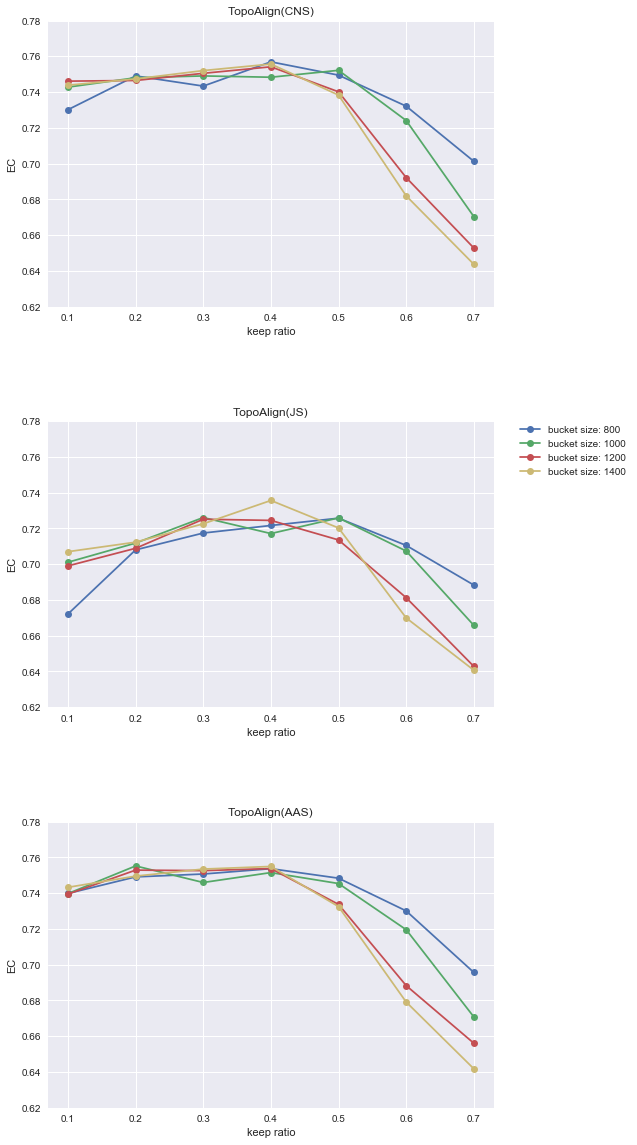

In [15]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
colors = ['b', 'g', 'r', 'y']

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = keep_ratio
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs1['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.62, 0.78, 0.02))
    ax.set_xlabel('keep ratio')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)
    
plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("results/bucket-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'


### Seed - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


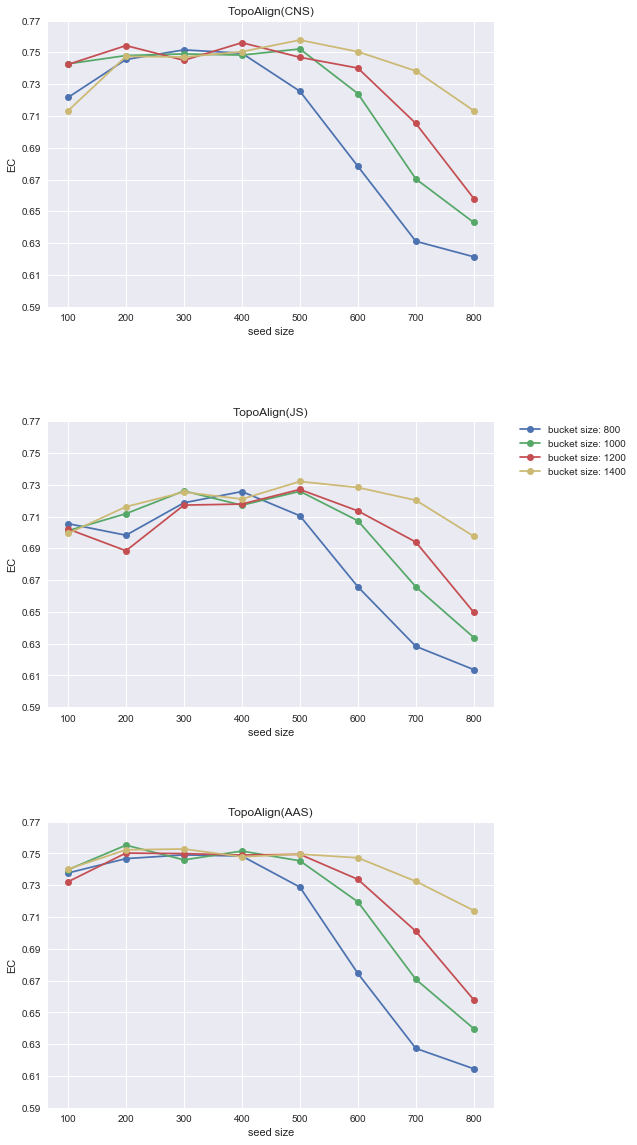

In [17]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

colors = ['b', 'g', 'r', 'y']

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = seed_size
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs2['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.59, 0.78, 0.02))
    ax.set_xlabel('seed size')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)

plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig("results/seed-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'

### network information

info, yeast, fly, human
nodes,
edges,
giant component,
average degree,
max degree,
components,


to tex

In [36]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606', '6239', '10090']
organism_names = ['S. cerevisiae', 'D. melanogaster', 'H. sapiens', 'C. elegans', 'M. musculus']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [5]:
def collect_information(orgobj):
    info = {}
    info['nodes'] = orgobj.node_count
    info['edges'] = int(sum(orgobj.degree)/2)
    info['components'] = orgobj.components()[0]
    unique, counts = np.unique(orgobj.components()[1], return_counts=True)
    info['giant component'] = max(counts)
    info['average degree'] = int(np.average(orgobj.degree)/2)
    info['max degree'] = int(max(orgobj.degree)/2)
    adj = orgobj.adjacency
    info['clustering coefficient'] = (np.linalg.matrix_power(adj, 3).trace() / 
                                      (np.linalg.matrix_power(adj, 2).sum() - 
                                       np.linalg.matrix_power(adj, 2).trace()))
    
    return info

In [6]:
infocul = ['nodes', 'edges', 'giant component', 'average degree', 'max degree', 'components', 'clustering coefficient']
infos = []
for orgobj in organism_objs:
    info = collect_information(orgobj)
    infos.append(info)

df = pd.DataFrame(data=infos, index=organism_names, columns=infocul)
df.T

,S. cerevisiae,D. melanogaster,H. sapiens,C. elegans,M. musculus
nodes,4372.000000,5999.000000,10694.000000,5867.000000,9577.000000
edges,55018.000000,77061.000000,206939.000000,68125.000000,185655.000000
giant component,4084.000000,5384.000000,10301.000000,5508.000000,9255.000000
average degree,12.000000,12.000000,19.000000,11.000000,19.000000
max degree,158.000000,325.000000,498.000000,198.000000,420.000000
components,98.000000,187.000000,160.000000,135.000000,123.000000
clustering coefficient,0.646918,0.547485,0.463359,0.564871,0.570875


In [29]:
print(df.T.to_latex())

for obj in infos:
    for key, val in obj.items():
        obj[key] = str(val)

\begin{tabular}{lrrrrr}
\toprule
{} &  S. cerevisiae &  D. melanogaster &     H. sapiens &    C. elegans &    M. musculus \\
\midrule
nodes                  &    4372.000000 &      5999.000000 &   10694.000000 &   5867.000000 &    9577.000000 \\
edges                  &   55018.000000 &     77061.000000 &  206939.000000 &  68125.000000 &  185655.000000 \\
giant component        &    4084.000000 &      5384.000000 &   10301.000000 &   5508.000000 &    9255.000000 \\
average degree         &      12.000000 &        12.000000 &      19.000000 &     11.000000 &      19.000000 \\
max degree             &     158.000000 &       325.000000 &     498.000000 &    198.000000 &     420.000000 \\
components             &      98.000000 &       187.000000 &     160.000000 &    135.000000 &     123.000000 \\
clustering coefficient &       0.646918 &         0.547485 &       0.463359 &      0.564871 &       0.570875 \\
\bottomrule
\end{tabular}



In [32]:
infocul = ['nodes', 'edges', 'giant component', 'average degree', 'max degree', 'components', 'clustering coefficient']
df = pd.DataFrame(data=infos, index=organism_names, columns=infocul)
df.T

,S. cerevisiae,D. melanogaster,H. sapiens,C. elegans,M. musculus
nodes,4372,5999,10694,5867,9577
edges,55018,77061,206939,68125,185655
giant component,4084,5384,10301,5508,9255
average degree,12,12,19,11,19
max degree,158,325,498,198,420
components,98,187,160,135,123
clustering coefficient,0.6469182490472886,0.5474851746446908,0.46335914380223014,0.5648710564892072,0.5708746888005637


In [40]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606', '6239', '10090']
organism_names = ['S. cerevisiae', 'D. melanogaster', 'H. sapiens', 'C. elegans', 'M. musculus']

# read organism PPI networks
cs.INTERACTION_THR = 950
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]


In [41]:
infocul = ['nodes', 'edges', 'giant component', 'average degree', 'max degree', 'components', 'clustering coefficient']
infos = []
for orgobj in organism_objs:
    info = collect_information(orgobj)
    infos.append(info)
    
for obj in infos:
    for key, val in obj.items():
        obj[key] = str(val)

df = pd.DataFrame(data=infos, index=organism_names, columns=infocul)
df.T

,S. cerevisiae,D. melanogaster,H. sapiens,C. elegans,M. musculus
nodes,3722,4318,7930,4403,6787
edges,36491,32199,51196,33719,52406
giant component,3312,3510,7310,3683,6115
average degree,9,7,6,7,7
max degree,108,131,121,83,126
components,109,235,182,197,209
clustering coefficient,0.7446149839237015,0.6044156608772446,0.5143702428770545,0.6206028630044642,0.6901774310943873
